# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('lending_club_loan_two.csv', on_bad_lines='skip')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [9]:
# CODE HERE

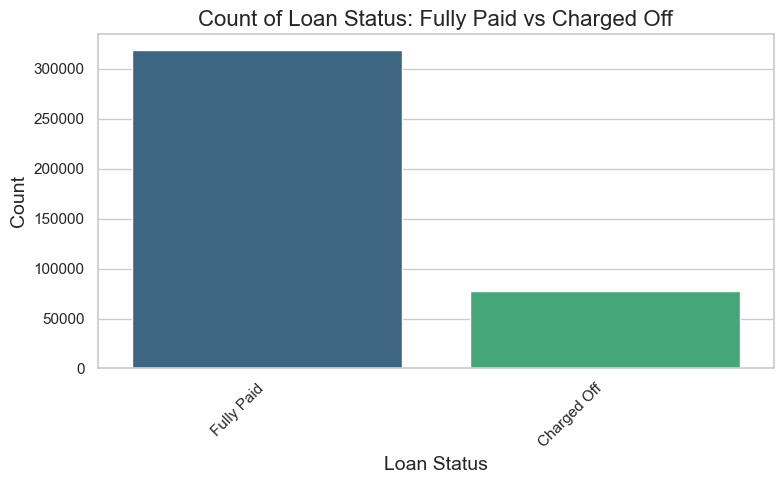

In [10]:
df_filtered = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df['loan_status'].value_counts
sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='loan_status', palette='viridis')

plt.title('Count of Loan Status: Fully Paid vs Charged Off', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**TASK: Create a histogram of the loan_amnt column.**

In [11]:
# CODE HERE

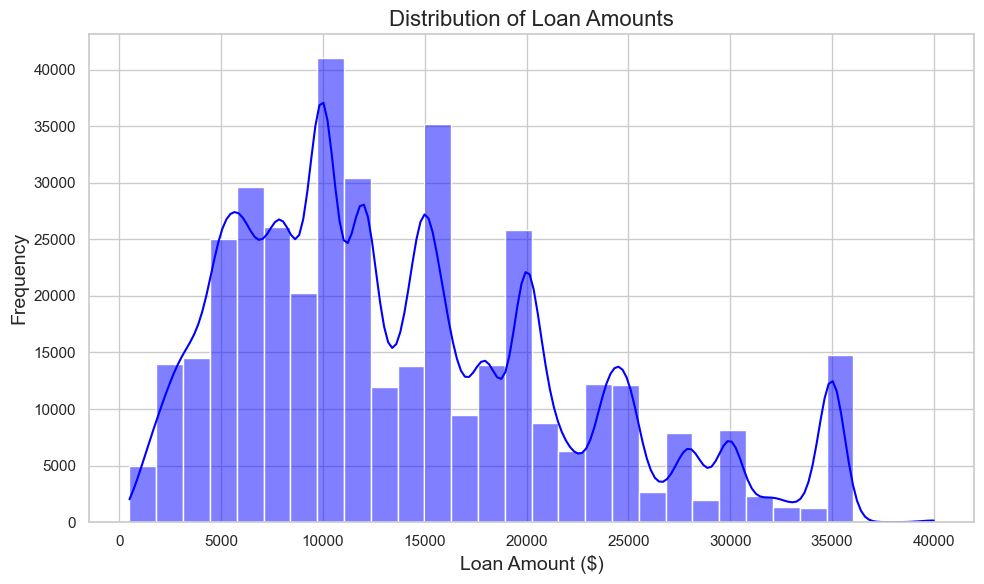

In [12]:
sns.set(style='whitegrid')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='blue')

# Add title and labels
plt.title('Distribution of Loan Amounts', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [13]:
# CODE HERE

In [14]:
continuous_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 
                       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
                       'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
df_continuous = df.dropna(subset=continuous_features)

correlation_matrix = df_continuous[continuous_features].corr()

# Display the correlation matrix
correlation_matrix

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.146735,0.955204,0.342439,0.008022,0.189816,-0.088782,0.327336,0.098439,0.213756,0.222381,-0.119373
int_rate,0.146735,1.000000,0.140152,-0.071418,0.071634,-0.003778,0.051631,-0.022941,0.273307,-0.048574,-0.082656,0.048571
installment,0.955204,0.140152,1.000000,0.335501,0.005908,0.177100,-0.080186,0.314857,0.120666,0.190935,0.193752,-0.112693
annual_inc,0.342439,-0.071418,0.335501,1.000000,-0.083982,0.132736,-0.016151,0.301699,0.027828,0.187723,0.236277,-0.055064
dti,0.008022,0.071634,0.005908,-0.083982,1.000000,0.125368,-0.023458,0.057162,0.079586,0.093456,-0.025401,-0.020180
open_acc,0.189816,-0.003778,0.177100,0.132736,0.125368,1.000000,-0.029735,0.214447,-0.144603,0.677767,0.109440,-0.039365
pub_rec,-0.088782,0.051631,-0.080186,-0.016151,-0.023458,-0.029735,1.000000,-0.106931,-0.089350,0.014364,0.011576,0.694636
revol_bal,0.327336,-0.022941,0.314857,0.301699,0.057162,0.214447,-0.106931,1.000000,0.220429,0.180877,0.195063,-0.131162
revol_util,0.098439,0.273307,0.120666,0.027828,0.079586,-0.144603,-0.089350,0.220429,1.000000,-0.114145,0.007514,-0.102004
total_acc,0.213756,-0.048574,0.190935,0.187723,0.093456,0.677767,0.014364,0.180877,-0.114145,1.000000,0.381205,0.038464


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [15]:
# CODE HERE

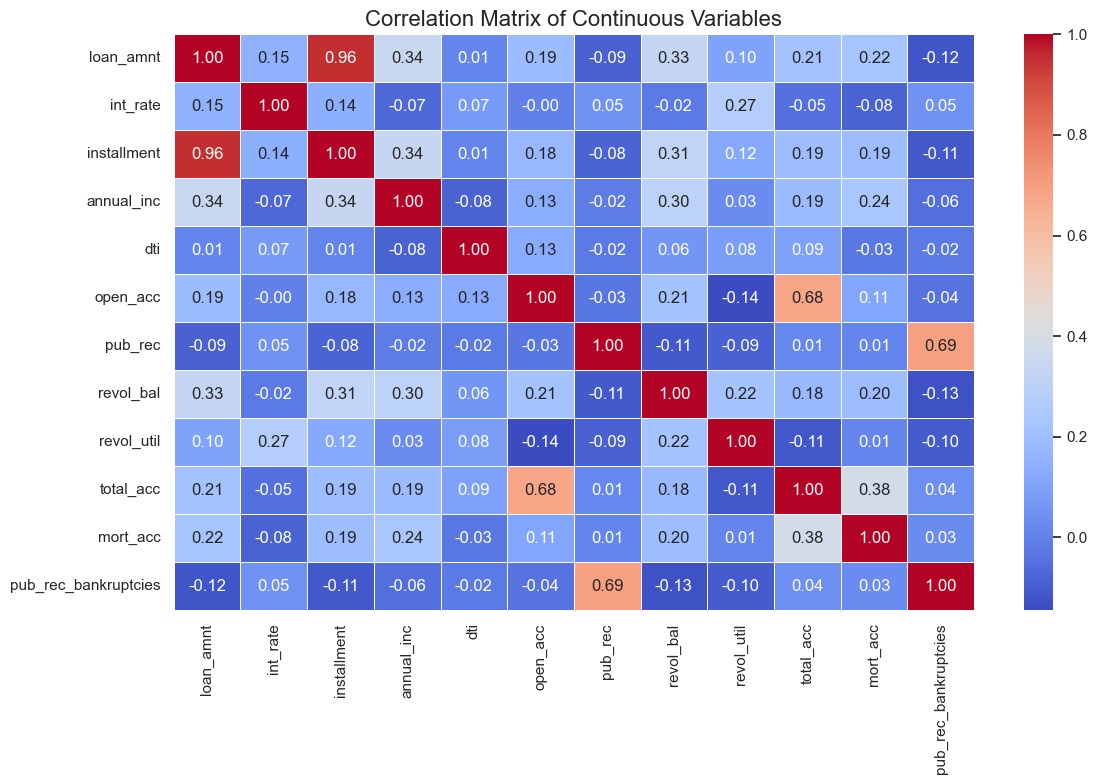

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style='white')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Continuous Variables', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [17]:
# CODE HERE
installment_desc = df_continuous['installment'].describe()
loan_amnt_desc = df_continuous['loan_amnt'].describe()

print("Installment Description:\n", installment_desc)
print("\nLoan Amount Description:\n", loan_amnt_desc)

Installment Description:
 count    358014.000000
mean        441.818122
std         251.911678
min          21.620000
25%         260.460000
50%         385.120000
75%         580.450000
max        1533.810000
Name: installment, dtype: float64

Loan Amount Description:
 count    358014.000000
mean      14386.901769
std        8385.102664
min        1000.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64


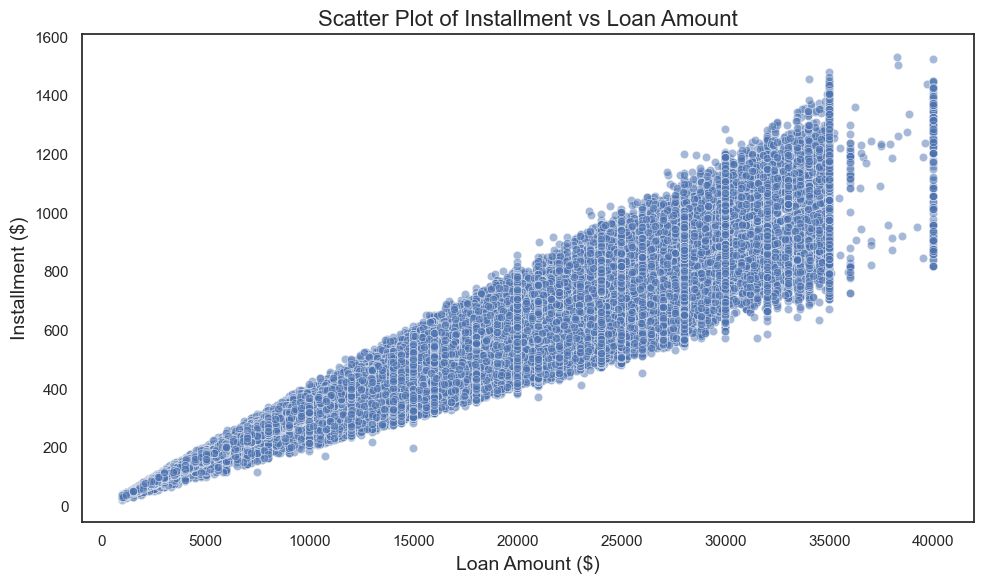

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between 'installment' and 'loan_amnt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='installment', data=df_continuous, alpha=0.5)

# Add title and labels
plt.title('Scatter Plot of Installment vs Loan Amount', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Installment ($)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [19]:
# CODE HERE

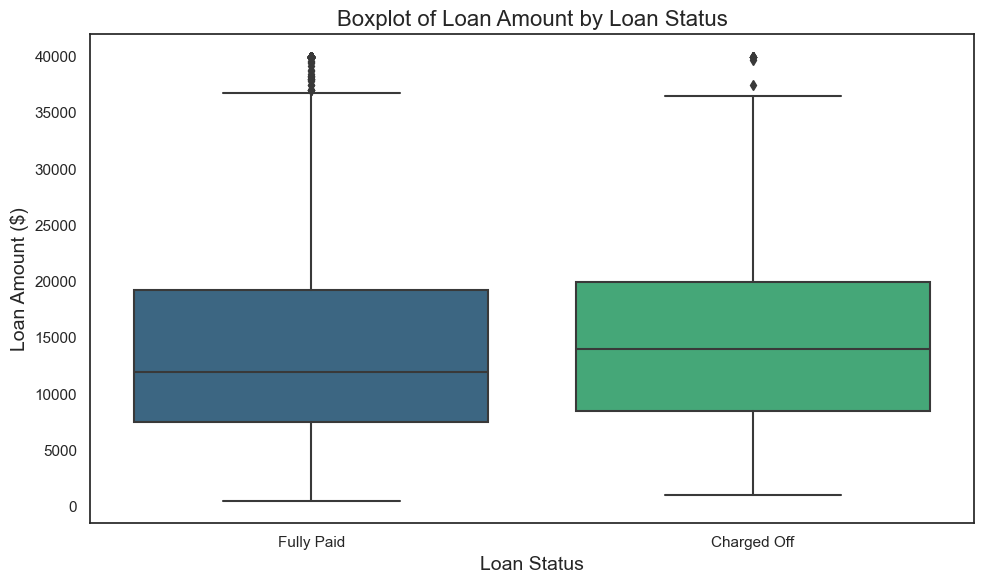

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='loan_status', y='loan_amnt', palette='viridis')

# Add title and labels
plt.title('Boxplot of Loan Amount by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Loan Amount ($)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [21]:
# CODE HERE

In [22]:
summary_stats = df_filtered.groupby('loan_status')['loan_amnt'].describe()

# Display the summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [23]:
# CODE HERE

In [24]:
unique_grades = df['grade'].dropna().unique()
unique_grades

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [25]:
unique_subgrades = df['sub_grade'].dropna().unique().reshape(-1,1)
unique_subgrades

array([['B4'],
       ['B5'],
       ['B3'],
       ['A2'],
       ['C5'],
       ['C3'],
       ['A1'],
       ['B2'],
       ['C1'],
       ['A5'],
       ['E4'],
       ['A4'],
       ['A3'],
       ['D1'],
       ['C2'],
       ['B1'],
       ['D3'],
       ['D5'],
       ['D2'],
       ['E1'],
       ['E2'],
       ['E5'],
       ['F4'],
       ['E3'],
       ['D4'],
       ['G1'],
       ['F5'],
       ['G2'],
       ['C4'],
       ['F1'],
       ['F3'],
       ['G5'],
       ['G4'],
       ['F2'],
       ['G3']], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

In [26]:
# CODE HERE

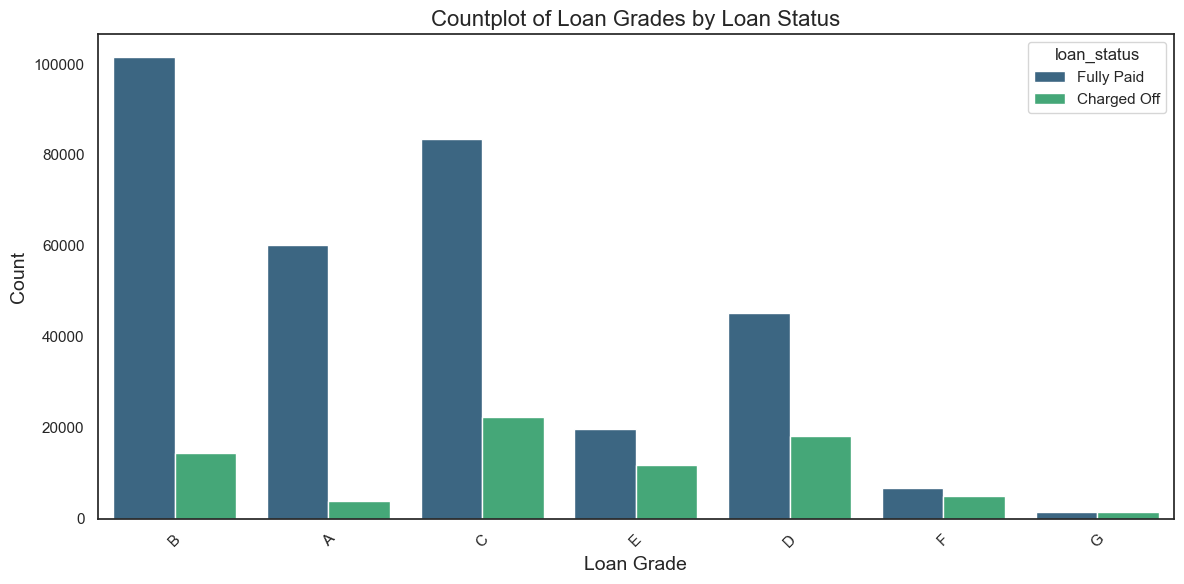

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='grade', hue='loan_status', palette='viridis')

# Add title and labels
plt.title('Countplot of Loan Grades by Loan Status', fontsize=16)
plt.xlabel('Loan Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [28]:
#CODE HERE

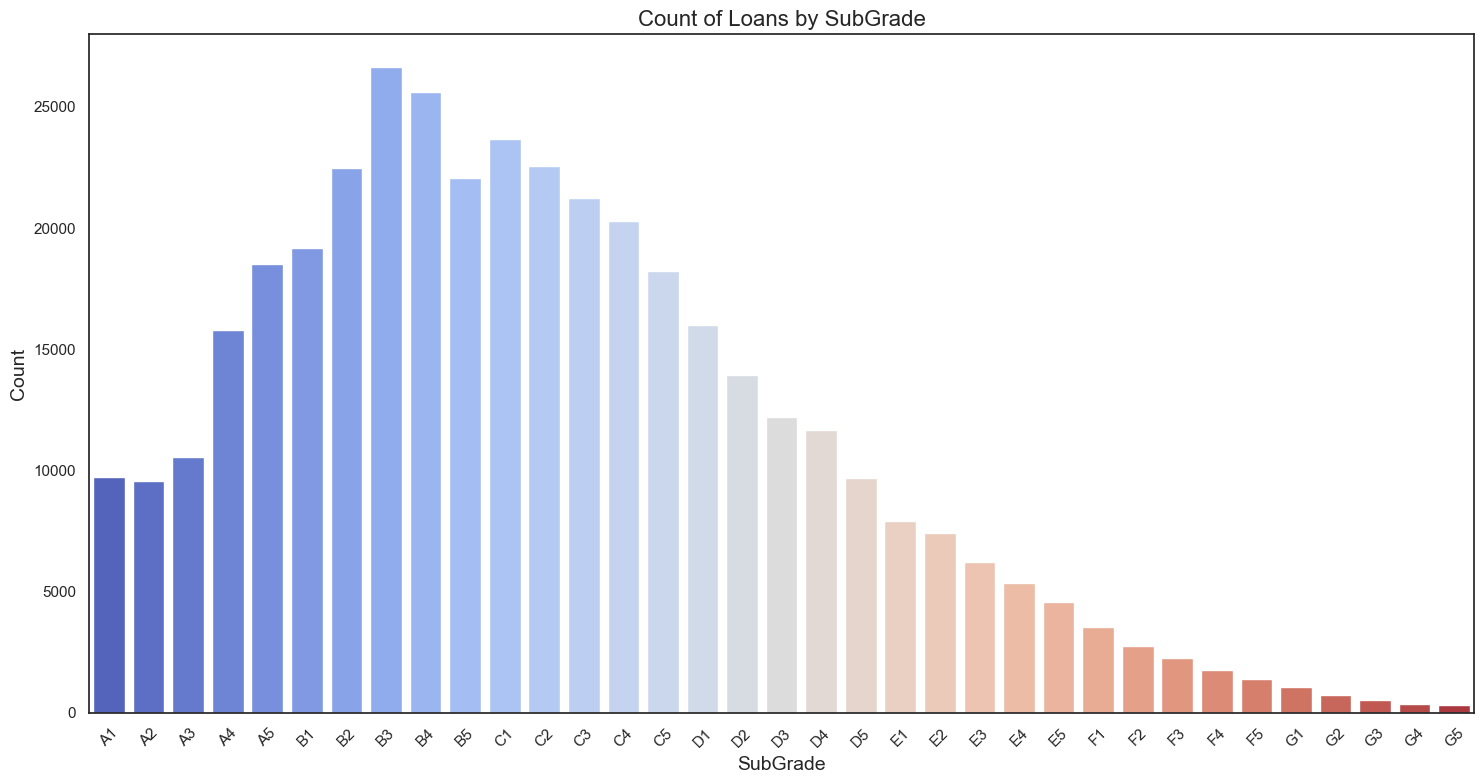

In [29]:
df_clean = df.dropna(subset=['sub_grade', 'loan_status'])

subgrade_order = sorted(df_clean['sub_grade'].unique())

# Create the countplot for all loans by subgrade
plt.figure(figsize=(15, 8))
sns.countplot(data=df_clean, x='sub_grade', order=subgrade_order, palette='coolwarm')

# Add title and labels
plt.title('Count of Loans by SubGrade', fontsize=16)
plt.xlabel('SubGrade', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
# CODE HERE

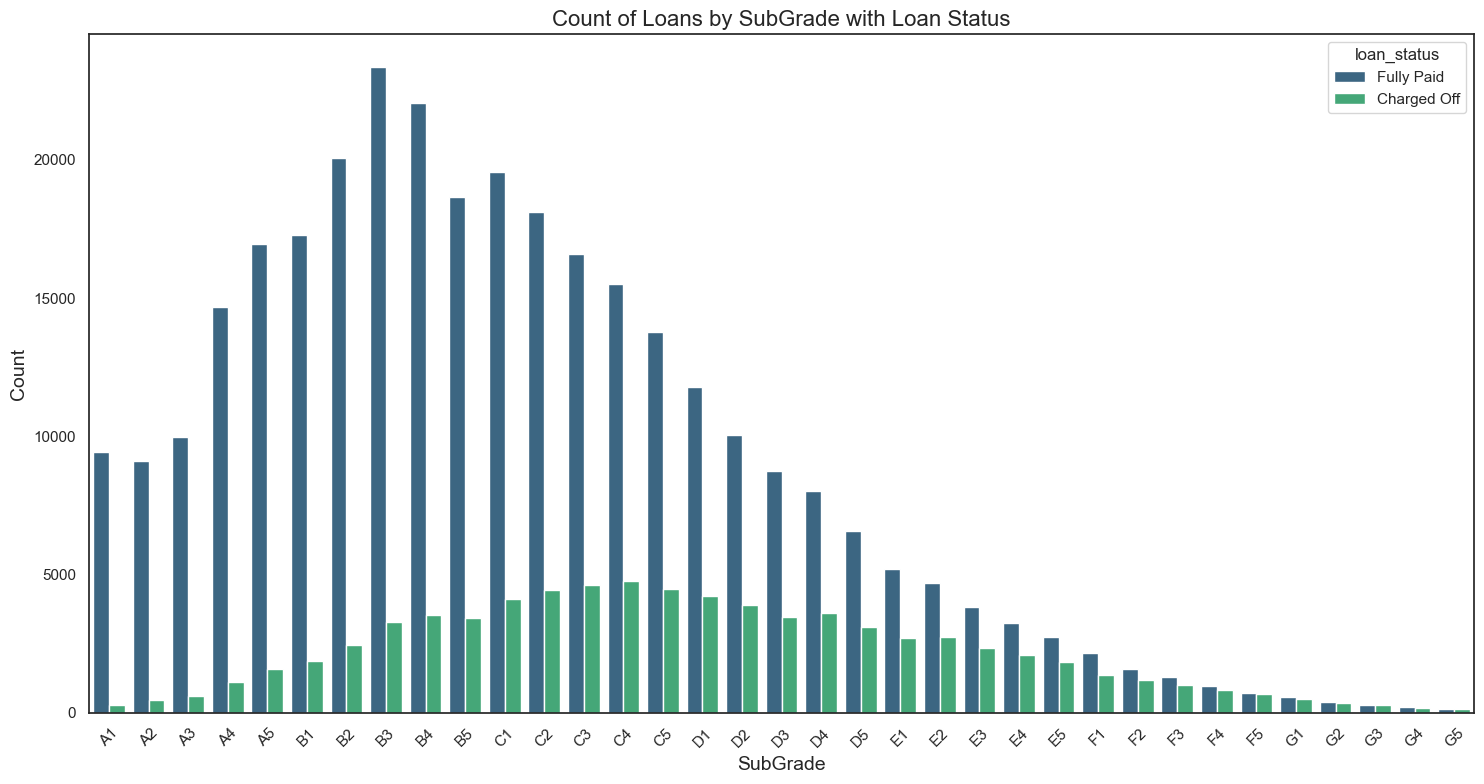

In [31]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_clean, x='sub_grade', hue='loan_status', order=subgrade_order, palette='viridis')

# Add title and labels
plt.title('Count of Loans by SubGrade with Loan Status', fontsize=16)
plt.xlabel('SubGrade', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [32]:
# CODE HERE

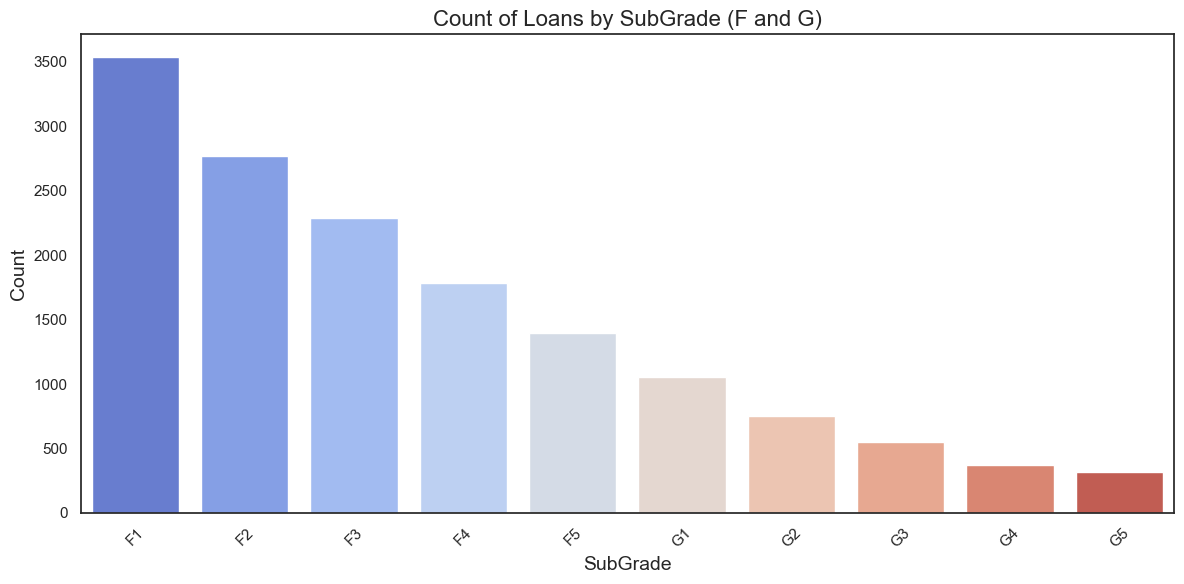

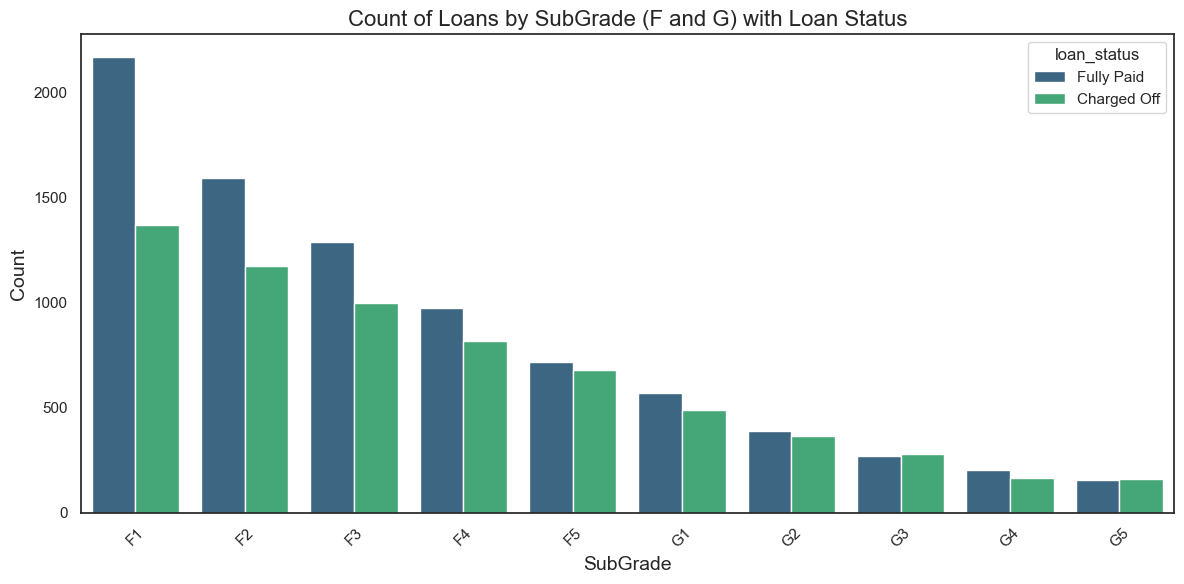

In [33]:
df_FG = df[df['sub_grade'].str.startswith('F') | df['sub_grade'].str.startswith('G')]

subgrade_order_FG = sorted(df_FG['sub_grade'].unique())

plt.figure(figsize=(12, 6))
sns.countplot(data=df_FG, x='sub_grade', order=subgrade_order_FG, palette='coolwarm')

plt.title('Count of Loans by SubGrade (F and G)', fontsize=16)
plt.xlabel('SubGrade', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_FG, x='sub_grade', hue='loan_status', order=subgrade_order_FG, palette='viridis')

# Add title and labels
plt.title('Count of Loans by SubGrade (F and G) with Loan Status', fontsize=16)
plt.xlabel('SubGrade', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [34]:
# CODE HERE

In [35]:
status_mapping = {
    "Fully Paid": 1,
    "Charged Off": 0
}

# Apply the mapping to create the 'loan_repaid' column
df['loan_repaid'] = df['loan_status'].map(status_mapping)

# Check the new column
df[['loan_status', 'loan_repaid']].head(10)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


In [36]:
df['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [37]:
#CODE HERE

C:\Users\User\AppData\Local\Temp\ipykernel_8280\2907139988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar', figsize=(12, 6), colormap='viridis')


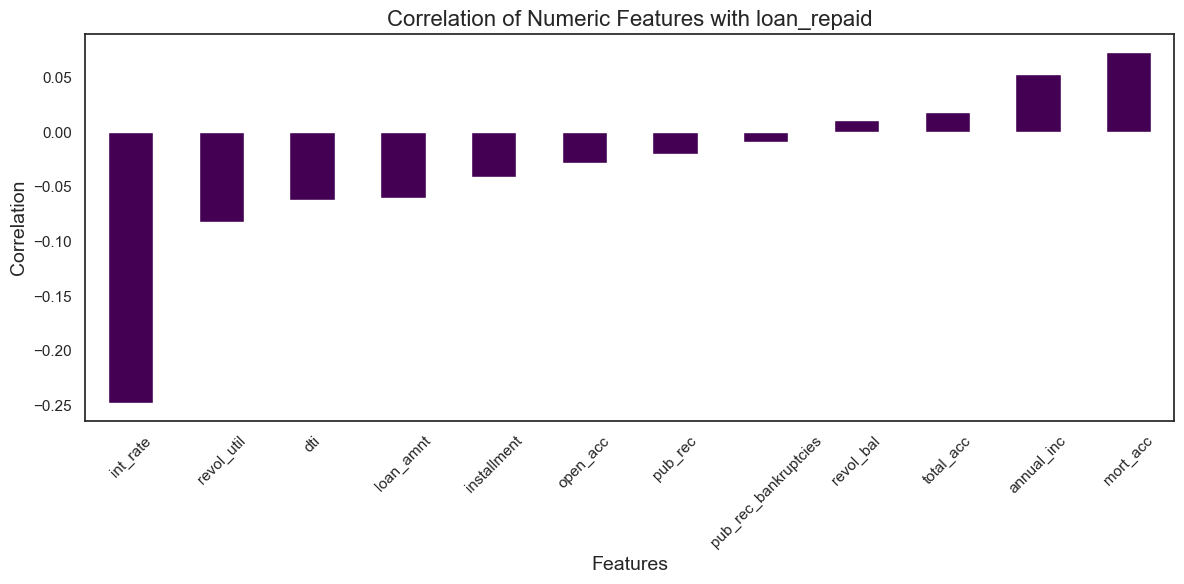

In [38]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Add title and labels
plt.title('Correlation of Numeric Features with loan_repaid', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [39]:
# CODE HERE
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [40]:
# CODE HERE
missing_values_series = df.isnull().sum()
missing_values_series

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [41]:
# CODE HERE

In [42]:
total_rows = len(df)

missing_values_percentage = (missing_values_series / total_rows) * 100

# Display the Series in percentage
print(missing_values_percentage)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [43]:
# CODE HERE

In [44]:
# Mock feat_info function for demonstration
def feat_info(feature):
    feature_descriptions = {
        'emp_title': 'The job title of the borrower when applying for the loan.',
        'emp_length': 'The length of employment at the current job in years. Ranges from 0 to 10+ years.'
    }
    return feature_descriptions.get(feature, "Feature information not available.")

# Use feat_info to get descriptions
emp_title_info = feat_info('emp_title')
emp_length_info = feat_info('emp_length')

# Print the feature information
print(f"Feature information for 'emp_title': {emp_title_info}")
print(f"Feature information for 'emp_length': {emp_length_info}")


Feature information for 'emp_title': The job title of the borrower when applying for the loan.
Feature information for 'emp_length': The length of employment at the current job in years. Ranges from 0 to 10+ years.


**TASK: How many unique employment job titles are there?**

In [45]:
# CODE HERE
unique_emp_titles_count = df['emp_title'].nunique()
unique_emp_titles_count

173105

In [46]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [47]:
# CODE HERE

In [48]:
df.drop('emp_title', axis=1, inplace=True)


**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [49]:
# CODE HERE
df['emp_length'].value_counts().index.sort_values()

Index(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object')

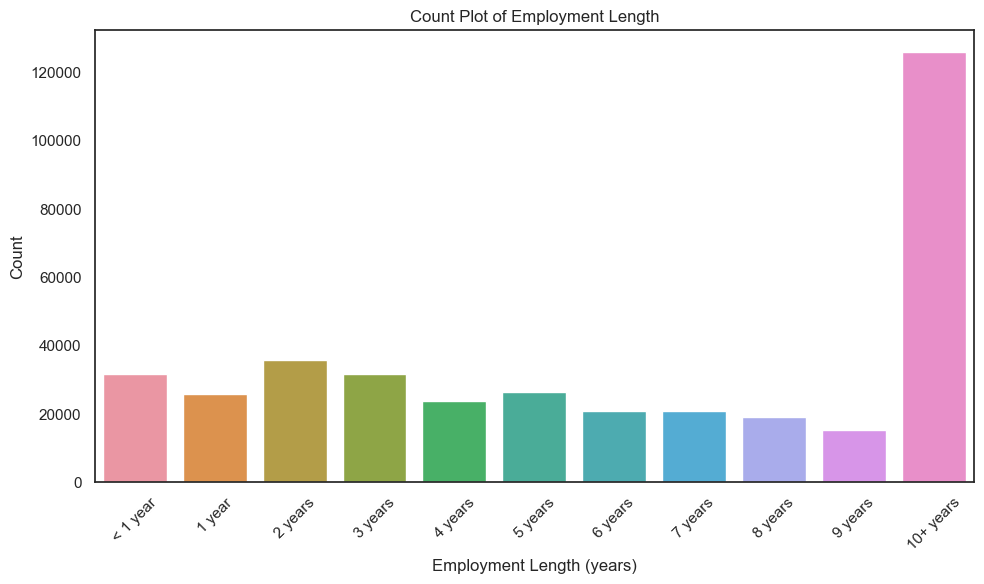

In [50]:
emp_length_order = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
    '6 years', '7 years', '8 years', '9 years', '10+ years'
]

# Plot count plot of emp_length with correct order
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=df, order=emp_length_order)
plt.xlabel('Employment Length (years)')
plt.ylabel('Count')
plt.title('Count Plot of Employment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

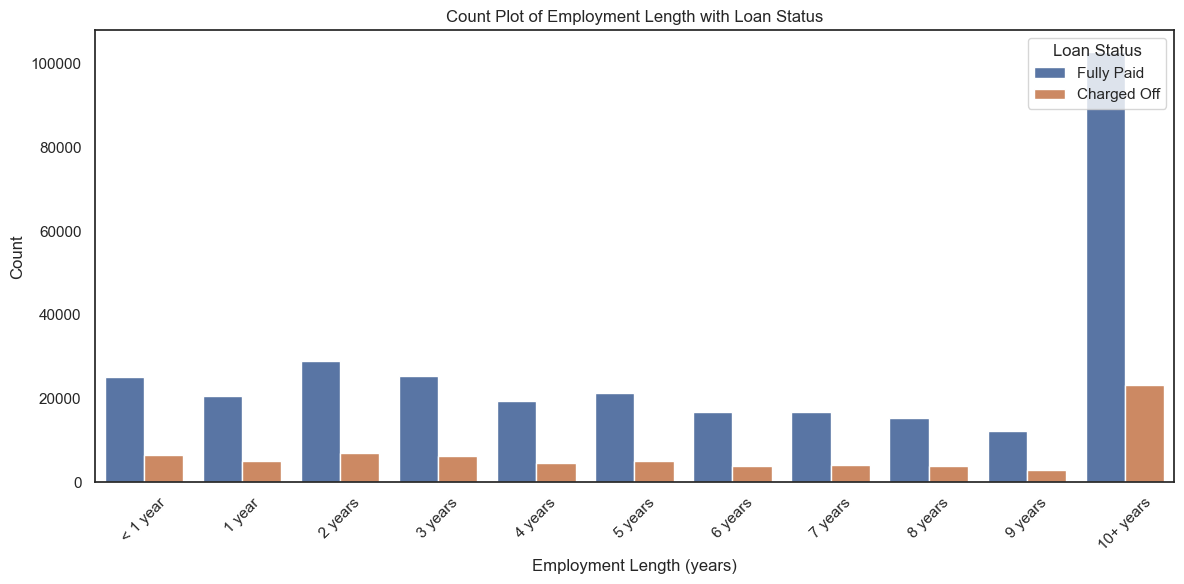

In [51]:
# CODE HERE
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')
plt.xlabel('Employment Length (years)')
plt.ylabel('Count')
plt.title('Count Plot of Employment Length with Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [52]:
# CODE HERE

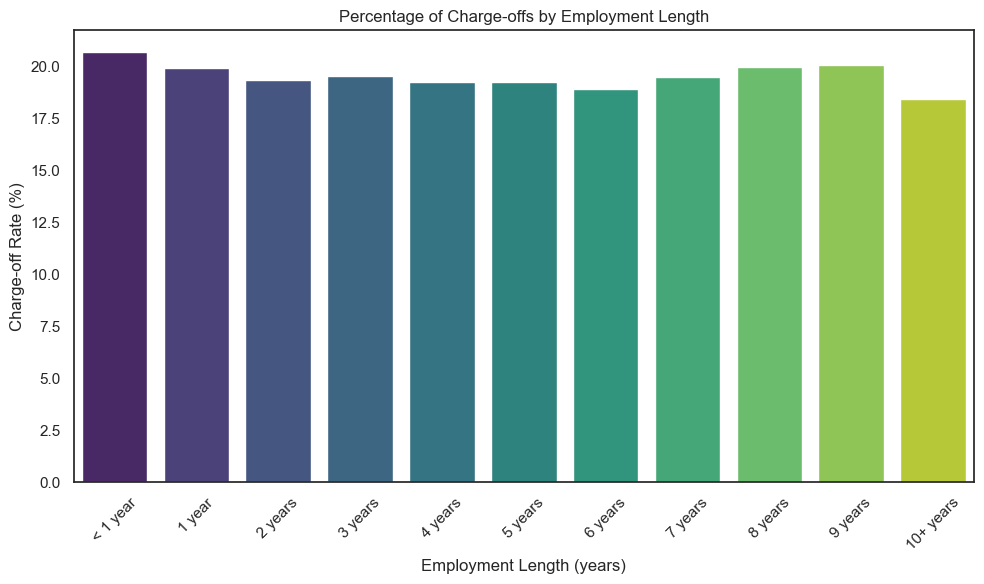

In [53]:
charge_off_rates = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').size() / df.groupby('emp_length').size() * 100

# Sort by employment length order
charge_off_rates = charge_off_rates.reindex(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
                                             '6 years', '7 years', '8 years', '9 years', '10+ years'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, palette='viridis')
plt.xlabel('Employment Length (years)')
plt.ylabel('Charge-off Rate (%)')
plt.title('Percentage of Charge-offs by Employment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [54]:
# CODE HERE

In [55]:
df.drop('emp_length', axis=1, inplace=True)


**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [56]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [57]:
# CODE HERE

In [58]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [59]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [60]:
# CODE HERE

In [61]:
df.drop('title', axis=1, inplace=True)


---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [62]:
# CODE HERE
def feat_info(feature):
    feature_descriptions = {
        'mort_acc': "The number of mortgage accounts the borrower has.",
        'loan_amnt': "The amount of the loan applied for by the borrower.",
        'term': "The term of the loan in months.",
        'int_rate': "The interest rate on the loan.",
        'installment': "The monthly installment payment owed by the borrower if the loan is approved.",
        'grade': "The loan grade assigned by LendingClub.",
        'sub_grade': "The loan subgrade assigned by LendingClub.",
        'emp_title': "The job title of the borrower.",
        'emp_length': "The length of employment in years.",
        'home_ownership': "The ownership status of the borrower's residence.",
        'annual_inc': "The annual income of the borrower.",
        'verification_status': "Indicates if the borrower's income was verified.",
        'issue_d': "The month the loan was funded.",
        'loan_status': "The current status of the loan.",
        'purpose': "The purpose of the loan as indicated by the borrower.",
        'title': "The loan title provided by the borrower.",
        'dti': "Debt-to-income ratio of the borrower.",
        'earliest_cr_line': "The month the borrower's earliest reported credit line was opened.",
        'open_acc': "The number of open credit lines in the borrower's credit report.",
        'pub_rec': "The number of derogatory public records.",
        'revol_bal': "Total credit revolving balance.",
        'revol_util': "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.",
        'total_acc': "The total number of credit lines currently in the borrower's credit report.",
        'initial_list_status': "The initial listing status of the loan.",
        'application_type': "Indicates whether the loan is an individual application or a joint application with two co-borrowers.",
        'mort_acc': "The number of mortgage accounts.",
        'pub_rec_bankruptcies': "Number of public record bankruptcies.",
        'address': "The address of the borrower."
    }
    return feature_descriptions.get(feature, "No description available.")

# Display description for 'mort_acc'
print(feat_info('mort_acc'))

The number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [63]:
# CODE HERE
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [64]:
correlations = df.corr()

# Display correlation with mort_acc
mort_acc_correlations = correlations['mort_acc'].sort_values(ascending=False)
mort_acc_correlations

C:\Users\User\AppData\Local\Temp\ipykernel_8280\2891891480.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [65]:
mort_acc_mean_by_total_acc = df.groupby('total_acc')['mort_acc'].mean()

# Define a function to fill missing mort_acc values based on total_acc
def fill_mort_acc(row):
    if pd.isna(row['mort_acc']):
        return mort_acc_mean_by_total_acc.get(row['total_acc'], np.nan)
    else:
        return row['mort_acc']

# Apply the function to fill missing values
df['mort_acc'] = df.apply(fill_mort_acc, axis=1)

# Verify the filled values
df['mort_acc']

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Name: mort_acc, Length: 396030, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [66]:
# CODE HERE

In [67]:
mort_acc_mean_by_total_acc = df.groupby('total_acc')['mort_acc'].mean()

# Define a function to fill missing mort_acc values based on total_acc
def fill_mort_acc(row):
    if pd.isna(row['mort_acc']):
        return mort_acc_mean_by_total_acc.get(row['total_acc'], np.nan)
    else:
        return row['mort_acc']

# Apply the function to fill missing values
df['mort_acc'] = df.apply(lambda row: fill_mort_acc(row), axis=1)


In [68]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [70]:
# CODE HERE

In [71]:
df = df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

# Verify the remaining missing values
missing_values = df[['revol_util', 'pub_rec_bankruptcies']].isnull().sum()
print(missing_values)
print(f"New DataFrame length: {len(df)}")

revol_util              0
pub_rec_bankruptcies    0
dtype: int64
New DataFrame length: 395219


## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [72]:
# CODE HERE

In [73]:
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [74]:
# CODE HERE

In [75]:
def term_to_numeric(term):
    return int(term.split()[0])

# Apply the function to the term column
df['term'] = df['term'].apply(term_to_numeric)

# Verify the conversion
print("Converted 'term' feature:", df['term'].head())
print("Data types after conversion:\n", df.dtypes)

Converted 'term' feature: 0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64
Data types after conversion:
 loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object


### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [76]:
# CODE HERE

In [77]:
df.drop('grade', axis=1, inplace=True)


**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [78]:
# CODE HERE

In [79]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

# Concatenate dummy variables with the original DataFrame
df = pd.concat([df, sub_grade_dummies], axis=1)

# Drop the original 'sub_grade' column
df.drop('sub_grade', axis=1, inplace=True)

# Verify the changes
df.head()


,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [80]:
# CODE HERE

In [81]:
dummy_columns = ['verification_status', 'application_type', 'initial_list_status', 'purpose']

# Create dummy variables and concatenate
df = pd.concat([df, pd.get_dummies(df[dummy_columns], drop_first=True)], axis=1)

# Drop the original columns
df.drop(dummy_columns, axis=1, inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [82]:
#CODE HERE

In [83]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [84]:
#CODE HERE

In [85]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

# Create dummy variables for the 'home_ownership' column
home_ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, home_ownership_dummies], axis=1)

# Drop the original 'home_ownership' column
df.drop('home_ownership', axis=1, inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [86]:
#CODE HERE

In [87]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

# Display the first few rows to verify the new column
print(df[['address', 'zip_code']].head())

                                             address zip_code
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690    22690
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113    05113
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113    05113
3            823 Reid Ford\r\nDelacruzside, MA 00813    00813
4             679 Luna Roads\r\nGreggshire, VA 11650    11650


**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [88]:
zip_code_dummies = pd.get_dummies(df['zip_code'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, zip_code_dummies], axis=1)

# Drop the original 'zip_code' and 'address' columns
df.drop(['zip_code', 'address'], axis=1, inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [89]:
#CODE HERE

In [90]:
df.drop('issue_d', axis=1, inplace=True)


### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [91]:
#CODE HERE

In [92]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

# Drop the original 'earliest_cr_line' column
df.drop('earliest_cr_line', axis=1, inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999


## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [93]:
from sklearn.model_selection import train_test_split


**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [94]:
# CODE HERE

In [95]:
df.drop('loan_status', axis=1, inplace=True)


**TASK: Set X and y variables to the .values of the features and label.**

In [96]:
#CODE HERE

In [97]:
X = df.drop('loan_repaid', axis=1).values  # Features excluding the target column
y = df['loan_repaid'].values  # Target column

# Verify the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (395219, 78)
Shape of y: (395219,)


----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [98]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [99]:
#CODE HERE

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Verify the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (316175, 78)
Shape of X_test: (79044, 78)
Shape of y_train: (316175,)
Shape of y_test: (79044,)


## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [101]:
# CODE HERE

In [102]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test (do NOT fit again)
X_test_scaled = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [103]:
83pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [105]:
model = Sequential()

model = Sequential()
model.add(Dense(units=78, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 78)                  │           6,162 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 78)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 39)                  │           3,081 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 39)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,023 (39.15 KB)

 Trainable params: 10,023 (39.15 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
87d=

SyntaxError: invalid decimal literal (3043814175.py, line 1)

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [ ]:
# CODE HERE

In [109]:
history = model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test), verbose=1)


Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8044 - loss: 0.4943 - val_accuracy: 0.8019 - val_loss: 0.4978
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8039 - loss: 0.4993 - val_accuracy: 0.8019 - val_loss: 0.4978
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8048 - loss: 0.4943 - val_accuracy: 0.8019 - val_loss: 0.4978
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8046 - loss: 0.4943 - val_accuracy: 0.8019 - val_loss: 0.4978
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8032 - loss: 0.4972 - val_accuracy: 0.8019 - val_loss: 0.4978
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8036 - loss: 0.4957 - val_accuracy: 0.8019 - val_loss: 0.4978
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8052 - loss: 0.4939 - val_accuracy: 0.8019 - val_loss: 0.4977
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8037 - loss: 0.4955 

**TASK: OPTIONAL: Save your model.**

In [ ]:
# CODE HERE

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [ ]:
# CODE HERE

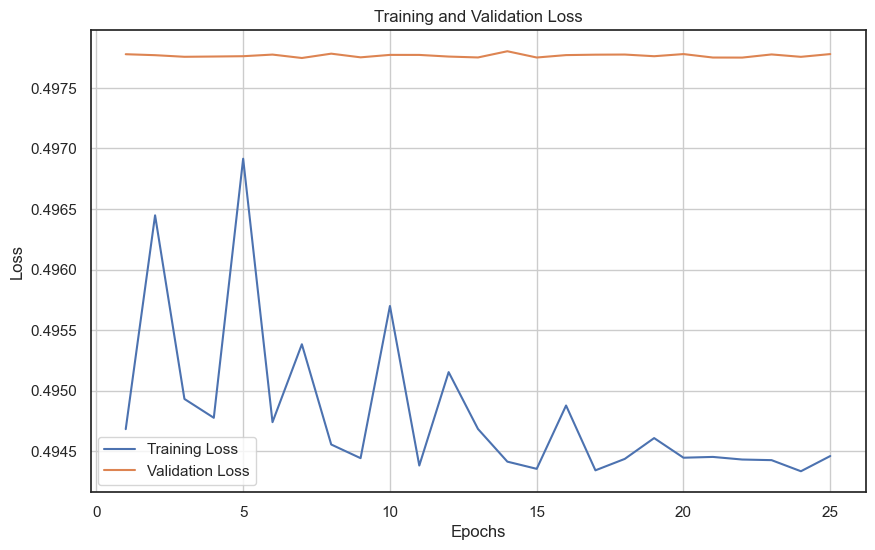

In [110]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Generate x-axis for epochs
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [ ]:
# CODE HERE

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)



# Display classification report
print(classification_report(y_test, y_pred_binary))


2471/2471 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15658
           1       0.80      1.00      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.40      0.50      0.45     79044
weighted avg       0.64      0.80      0.71     79044



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
print(confusion_matrix(y_test, y_pred_binary))

[[    0 15658]
 [    0 63386]]


**TASK: Given the customer below, would you offer this person a loan?**

In [117]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
# CODE HERE

In [120]:
import numpy as np

# Assuming you have imported necessary libraries and defined/trained your model

# Extract features for new_customer and preprocess them
new_customer_features = new_customer.values.reshape(1, -1)  # Reshape to match model input shape

# Make prediction
prediction_prob = model.predict(new_customer_features)

# Interpret prediction
if prediction_prob >= 0.5:
    print("Based on the model prediction, you should offer the loan to this person.")
else:
    print("Based on the model prediction, you should not offer the loan to this person.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Based on the model prediction, you should offer the loan to this person.


**TASK: Now check, did this person actually end up paying back their loan?**

In [ ]:
# CODE HERE

In [121]:
new_customer_index = df[df.drop('loan_repaid', axis=1).eq(new_customer).all(1)].index[0]

# Check if this person actually paid back their loan
actual_loan_repaid = df.loc[new_customer_index, 'loan_repaid']

if actual_loan_repaid == 1:
    print("The person actually paid back their loan.")
else:
    print("The person did not pay back their loan.")

The person actually paid back their loan.


# GREAT JOB!